# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

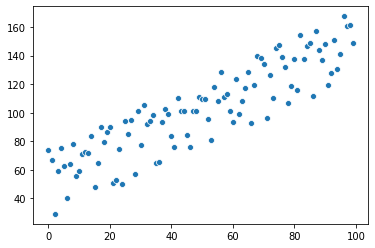

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 547.835595
Iteration 1 | Cost: 542.776417
Iteration 2 | Cost: 538.004569
Iteration 3 | Cost: 533.503375
Iteration 4 | Cost: 529.257130
Iteration 5 | Cost: 525.251039
Iteration 6 | Cost: 521.471167
Iteration 7 | Cost: 517.904386
Iteration 8 | Cost: 514.538331
Iteration 9 | Cost: 511.361354
Iteration 10 | Cost: 508.362484
Iteration 11 | Cost: 505.531386
Iteration 12 | Cost: 502.858325
Iteration 13 | Cost: 500.334130
Iteration 14 | Cost: 497.950164
Iteration 15 | Cost: 495.698291
Iteration 16 | Cost: 493.570845
Iteration 17 | Cost: 491.560608
Iteration 18 | Cost: 489.660779
Iteration 19 | Cost: 487.864952
Iteration 20 | Cost: 486.167093
Iteration 21 | Cost: 484.561518
Iteration 22 | Cost: 483.042873
Iteration 23 | Cost: 481.606115
Iteration 24 | Cost: 480.246493
Iteration 25 | Cost: 478.959533
Iteration 26 | Cost: 477.741019
Iteration 27 | Cost: 476.586981
Iteration 28 | Cost: 475.493678
Iteration 29 | Cost: 474.457588
Iteration 30 | Cost: 473.475393
Iteration 31 | Cos

Iteration 1140 | Cost: 357.571864
Iteration 1141 | Cost: 357.494855
Iteration 1142 | Cost: 357.417869
Iteration 1143 | Cost: 357.340907
Iteration 1144 | Cost: 357.263968
Iteration 1145 | Cost: 357.187052
Iteration 1146 | Cost: 357.110160
Iteration 1147 | Cost: 357.033292
Iteration 1148 | Cost: 356.956447
Iteration 1149 | Cost: 356.879625
Iteration 1150 | Cost: 356.802826
Iteration 1151 | Cost: 356.726051
Iteration 1152 | Cost: 356.649300
Iteration 1153 | Cost: 356.572571
Iteration 1154 | Cost: 356.495866
Iteration 1155 | Cost: 356.419185
Iteration 1156 | Cost: 356.342527
Iteration 1157 | Cost: 356.265892
Iteration 1158 | Cost: 356.189280
Iteration 1159 | Cost: 356.112692
Iteration 1160 | Cost: 356.036127
Iteration 1161 | Cost: 355.959585
Iteration 1162 | Cost: 355.883067
Iteration 1163 | Cost: 355.806572
Iteration 1164 | Cost: 355.730100
Iteration 1165 | Cost: 355.653652
Iteration 1166 | Cost: 355.577226
Iteration 1167 | Cost: 355.500825
Iteration 1168 | Cost: 355.424446
Iteration 1169

Iteration 3196 | Cost: 239.874993
Iteration 3197 | Cost: 239.833814
Iteration 3198 | Cost: 239.792648
Iteration 3199 | Cost: 239.751495
Iteration 3200 | Cost: 239.710354
Iteration 3201 | Cost: 239.669225
Iteration 3202 | Cost: 239.628109
Iteration 3203 | Cost: 239.587006
Iteration 3204 | Cost: 239.545915
Iteration 3205 | Cost: 239.504836
Iteration 3206 | Cost: 239.463770
Iteration 3207 | Cost: 239.422717
Iteration 3208 | Cost: 239.381676
Iteration 3209 | Cost: 239.340647
Iteration 3210 | Cost: 239.299631
Iteration 3211 | Cost: 239.258628
Iteration 3212 | Cost: 239.217637
Iteration 3213 | Cost: 239.176658
Iteration 3214 | Cost: 239.135692
Iteration 3215 | Cost: 239.094738
Iteration 3216 | Cost: 239.053797
Iteration 3217 | Cost: 239.012868
Iteration 3218 | Cost: 238.971952
Iteration 3219 | Cost: 238.931048
Iteration 3220 | Cost: 238.890157
Iteration 3221 | Cost: 238.849278
Iteration 3222 | Cost: 238.808412
Iteration 3223 | Cost: 238.767558
Iteration 3224 | Cost: 238.726716
Iteration 3225

Iteration 5330 | Cost: 175.242084
Iteration 5331 | Cost: 175.220581
Iteration 5332 | Cost: 175.199085
Iteration 5333 | Cost: 175.177596
Iteration 5334 | Cost: 175.156113
Iteration 5335 | Cost: 175.134637
Iteration 5336 | Cost: 175.113167
Iteration 5337 | Cost: 175.091704
Iteration 5338 | Cost: 175.070247
Iteration 5339 | Cost: 175.048797
Iteration 5340 | Cost: 175.027353
Iteration 5341 | Cost: 175.005916
Iteration 5342 | Cost: 174.984486
Iteration 5343 | Cost: 174.963062
Iteration 5344 | Cost: 174.941644
Iteration 5345 | Cost: 174.920233
Iteration 5346 | Cost: 174.898829
Iteration 5347 | Cost: 174.877431
Iteration 5348 | Cost: 174.856039
Iteration 5349 | Cost: 174.834654
Iteration 5350 | Cost: 174.813276
Iteration 5351 | Cost: 174.791904
Iteration 5352 | Cost: 174.770538
Iteration 5353 | Cost: 174.749180
Iteration 5354 | Cost: 174.727827
Iteration 5355 | Cost: 174.706481
Iteration 5356 | Cost: 174.685142
Iteration 5357 | Cost: 174.663809
Iteration 5358 | Cost: 174.642482
Iteration 5359

Iteration 7408 | Cost: 142.126670
Iteration 7409 | Cost: 142.115249
Iteration 7410 | Cost: 142.103832
Iteration 7411 | Cost: 142.092418
Iteration 7412 | Cost: 142.081007
Iteration 7413 | Cost: 142.069600
Iteration 7414 | Cost: 142.058196
Iteration 7415 | Cost: 142.046796
Iteration 7416 | Cost: 142.035399
Iteration 7417 | Cost: 142.024005
Iteration 7418 | Cost: 142.012616
Iteration 7419 | Cost: 142.001229
Iteration 7420 | Cost: 141.989846
Iteration 7421 | Cost: 141.978467
Iteration 7422 | Cost: 141.967091
Iteration 7423 | Cost: 141.955718
Iteration 7424 | Cost: 141.944349
Iteration 7425 | Cost: 141.932983
Iteration 7426 | Cost: 141.921621
Iteration 7427 | Cost: 141.910263
Iteration 7428 | Cost: 141.898907
Iteration 7429 | Cost: 141.887556
Iteration 7430 | Cost: 141.876207
Iteration 7431 | Cost: 141.864862
Iteration 7432 | Cost: 141.853521
Iteration 7433 | Cost: 141.842183
Iteration 7434 | Cost: 141.830848
Iteration 7435 | Cost: 141.819517
Iteration 7436 | Cost: 141.808190
Iteration 7437

Iteration 9852 | Cost: 122.435896
Iteration 9853 | Cost: 122.430470
Iteration 9854 | Cost: 122.425045
Iteration 9855 | Cost: 122.419621
Iteration 9856 | Cost: 122.414200
Iteration 9857 | Cost: 122.408780
Iteration 9858 | Cost: 122.403361
Iteration 9859 | Cost: 122.397945
Iteration 9860 | Cost: 122.392529
Iteration 9861 | Cost: 122.387116
Iteration 9862 | Cost: 122.381704
Iteration 9863 | Cost: 122.376294
Iteration 9864 | Cost: 122.370885
Iteration 9865 | Cost: 122.365479
Iteration 9866 | Cost: 122.360073
Iteration 9867 | Cost: 122.354670
Iteration 9868 | Cost: 122.349268
Iteration 9869 | Cost: 122.343868
Iteration 9870 | Cost: 122.338469
Iteration 9871 | Cost: 122.333072
Iteration 9872 | Cost: 122.327677
Iteration 9873 | Cost: 122.322283
Iteration 9874 | Cost: 122.316891
Iteration 9875 | Cost: 122.311500
Iteration 9876 | Cost: 122.306112
Iteration 9877 | Cost: 122.300724
Iteration 9878 | Cost: 122.295339
Iteration 9879 | Cost: 122.289955
Iteration 9880 | Cost: 122.284573
Iteration 9881

Iteration 11840 | Cost: 114.341470
Iteration 11841 | Cost: 114.338507
Iteration 11842 | Cost: 114.335546
Iteration 11843 | Cost: 114.332585
Iteration 11844 | Cost: 114.329625
Iteration 11845 | Cost: 114.326666
Iteration 11846 | Cost: 114.323708
Iteration 11847 | Cost: 114.320751
Iteration 11848 | Cost: 114.317795
Iteration 11849 | Cost: 114.314840
Iteration 11850 | Cost: 114.311886
Iteration 11851 | Cost: 114.308932
Iteration 11852 | Cost: 114.305980
Iteration 11853 | Cost: 114.303028
Iteration 11854 | Cost: 114.300077
Iteration 11855 | Cost: 114.297127
Iteration 11856 | Cost: 114.294178
Iteration 11857 | Cost: 114.291230
Iteration 11858 | Cost: 114.288283
Iteration 11859 | Cost: 114.285337
Iteration 11860 | Cost: 114.282391
Iteration 11861 | Cost: 114.279447
Iteration 11862 | Cost: 114.276503
Iteration 11863 | Cost: 114.273561
Iteration 11864 | Cost: 114.270619
Iteration 11865 | Cost: 114.267678
Iteration 11866 | Cost: 114.264738
Iteration 11867 | Cost: 114.261799
Iteration 11868 | Co

Iteration 13985 | Cost: 109.674662
Iteration 13986 | Cost: 109.673120
Iteration 13987 | Cost: 109.671578
Iteration 13988 | Cost: 109.670038
Iteration 13989 | Cost: 109.668497
Iteration 13990 | Cost: 109.666957
Iteration 13991 | Cost: 109.665418
Iteration 13992 | Cost: 109.663879
Iteration 13993 | Cost: 109.662341
Iteration 13994 | Cost: 109.660803
Iteration 13995 | Cost: 109.659265
Iteration 13996 | Cost: 109.657728
Iteration 13997 | Cost: 109.656191
Iteration 13998 | Cost: 109.654655
Iteration 13999 | Cost: 109.653120
Iteration 14000 | Cost: 109.651584
Iteration 14001 | Cost: 109.650050
Iteration 14002 | Cost: 109.648515
Iteration 14003 | Cost: 109.646982
Iteration 14004 | Cost: 109.645448
Iteration 14005 | Cost: 109.643915
Iteration 14006 | Cost: 109.642383
Iteration 14007 | Cost: 109.640851
Iteration 14008 | Cost: 109.639320
Iteration 14009 | Cost: 109.637789
Iteration 14010 | Cost: 109.636258
Iteration 14011 | Cost: 109.634728
Iteration 14012 | Cost: 109.633198
Iteration 14013 | Co

Iteration 16114 | Cost: 107.258792
Iteration 16115 | Cost: 107.257985
Iteration 16116 | Cost: 107.257179
Iteration 16117 | Cost: 107.256373
Iteration 16118 | Cost: 107.255568
Iteration 16119 | Cost: 107.254763
Iteration 16120 | Cost: 107.253958
Iteration 16121 | Cost: 107.253153
Iteration 16122 | Cost: 107.252348
Iteration 16123 | Cost: 107.251544
Iteration 16124 | Cost: 107.250740
Iteration 16125 | Cost: 107.249936
Iteration 16126 | Cost: 107.249132
Iteration 16127 | Cost: 107.248329
Iteration 16128 | Cost: 107.247526
Iteration 16129 | Cost: 107.246723
Iteration 16130 | Cost: 107.245920
Iteration 16131 | Cost: 107.245118
Iteration 16132 | Cost: 107.244316
Iteration 16133 | Cost: 107.243514
Iteration 16134 | Cost: 107.242712
Iteration 16135 | Cost: 107.241911
Iteration 16136 | Cost: 107.241110
Iteration 16137 | Cost: 107.240309
Iteration 16138 | Cost: 107.239508
Iteration 16139 | Cost: 107.238708
Iteration 16140 | Cost: 107.237908
Iteration 16141 | Cost: 107.237108
Iteration 16142 | Co

Iteration 18255 | Cost: 105.990312
Iteration 18256 | Cost: 105.989892
Iteration 18257 | Cost: 105.989472
Iteration 18258 | Cost: 105.989052
Iteration 18259 | Cost: 105.988632
Iteration 18260 | Cost: 105.988213
Iteration 18261 | Cost: 105.987793
Iteration 18262 | Cost: 105.987374
Iteration 18263 | Cost: 105.986954
Iteration 18264 | Cost: 105.986535
Iteration 18265 | Cost: 105.986116
Iteration 18266 | Cost: 105.985698
Iteration 18267 | Cost: 105.985279
Iteration 18268 | Cost: 105.984860
Iteration 18269 | Cost: 105.984442
Iteration 18270 | Cost: 105.984023
Iteration 18271 | Cost: 105.983605
Iteration 18272 | Cost: 105.983187
Iteration 18273 | Cost: 105.982769
Iteration 18274 | Cost: 105.982351
Iteration 18275 | Cost: 105.981934
Iteration 18276 | Cost: 105.981516
Iteration 18277 | Cost: 105.981099
Iteration 18278 | Cost: 105.980681
Iteration 18279 | Cost: 105.980264
Iteration 18280 | Cost: 105.979847
Iteration 18281 | Cost: 105.979430
Iteration 18282 | Cost: 105.979013
Iteration 18283 | Co

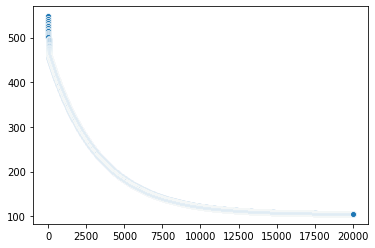

In [11]:
numEpochs= 20000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise